#MiniProject1: MACHINE LEARNING 

##Task 1: Acquire, preprocess, and analyze the data

### Resource imports, project setup

To run this code on anyone's machine, upload the data as a CSV (attached with our submission) in your personnal google drive, under a directory structure called Classes/COMP551/A1. Alternatively, replace our pd.read_csv calls with your own data import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#This mounts google drive
from google.colab import drive
drive.mount('/content/drive')

#This is the path to find the resource (/content/drive/My Drive/ is by default)
path='/content/drive/My Drive/Classes/COMP551/A1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Loading and exploring the data

In [2]:
#For first dataset, added a first row to name all of the features
hepa=pd.read_csv(path + 'hepatitis.csv')
diab=pd.read_csv(path + 'messidor_features.csv')

Following our import, we notice that some of the columns have been loaded as dtype object instead of numerical in the hepa dataset. This will needs to be fixed during the cleaning step.


In [3]:
hepa.dtypes

Class               int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In the hepatite dataset, the Class column is considered to be the label which we will try to predict later on. A value of 1 means that the patient has died, while a value of 2 means that the patient lives. 

In [4]:
hepa.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [5]:
#No issues with diab dataset dtypes
diab.dtypes

f0       int64
f1       int64
f2       int64
f3       int64
f4       int64
f5       int64
f6       int64
f7       int64
f8     float64
f9     float64
f10    float64
f11    float64
f12    float64
f13    float64
f14    float64
f15    float64
f16    float64
f17    float64
f18      int64
f19      int64
dtype: object

In the diabetes dataset, the f19 column is considered to be the label which we will try to predict later on. A value of 1 means that the patient contains signs of Diabetic Retinopathy (DR), while a value of 0 means that the patient has no signs of DR.

In [6]:
diab.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


### 1.2 Preprocessing Data

We now clean the data we imported in the previous section, starting with removing the "?" values from the hepa dataset:

Preprocessing the hepatitis dataset, we note the following:
8. Missing Attribute Values: (indicated by "?")
     Attribute Number:    Number of Missing Values:
                    1:    0
                    2:    0
                    3:    0
                    4:    1
                    5:    0
                    6:    1
                    7:    1
                    8:    1
                    9:    10
		            10:    11
		            11:    5
		            12:    5
		            13:    5
		            14:    5
		            15:    6
		            16:    29
		            17:    4
		            18:    16
		            19:    67
		            20:    0
Given the high number of missing values in features 19 and 16, we choose to drop these columns entirely. 
We will then remove the rows with at least one missing feature. 

In [7]:
del hepa["PROTIME"]
del hepa["ALK PHOSPHATE"]
#Deletes whole column
hepa = hepa.drop(hepa[hepa.eq('?').any(1)].index)
#Deletes all rows with missing information
hepa.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,ALBUMIN,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,18,4.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,42,3.5,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,32,4.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,200,4.0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,28,4.0,1


In [8]:
#Fixing the Dtype issue from the hepa dataset
colsToFix = ["STEROID","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM",
             "SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","SGOT","ALBUMIN"]
for col in colsToFix:
  hepa[col] = pd.to_numeric(hepa[col])

In [9]:
#Sanity check on dtypes
hepa.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER BIG            int64
LIVER FIRM           int64
SPLEEN PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
SGOT                 int64
ALBUMIN            float64
HISTOLOGY            int64
dtype: object

In [10]:
#Printing the entire dataset so you can check that all the "?" values are gone
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(hepa)

     Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0        2   30    2        1           2        2        2         2   
1        2   50    1        1           2        1        2         2   
2        2   78    1        2           2        1        2         2   
4        2   34    1        2           2        2        2         2   
5        2   34    1        2           2        2        2         2   
8        2   39    1        2           2        1        2         2   
9        2   30    1        2           2        2        2         2   
10       2   39    1        1           1        2        2         2   
11       2   32    1        2           1        1        2         2   
12       2   41    1        2           1        1        2         2   
13       2   30    1        2           2        1        2         2   
15       2   38    1        1           2        1        1         1   
16       2   66    1        2           2        1 

The hepa dataset has now been cleaned succesfully, dropping all missing values and keeping everything else.

In [11]:
#There appears to be no missing values (NaN or null) in the diab dataset
diab.isna().any().any()
diab.isnull().any().any()

False

### 1.3 Analysing data

In [12]:
#Prints basic statistics
hepa.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,ALBUMIN,HISTOLOGY
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1.813953,40.806202,1.100775,1.534884,1.829457,1.348837,1.620155,1.798450,1.821705,1.550388,1.821705,1.651163,1.868217,1.868217,1.393798,79.465116,3.827907,1.441860
std,0.390661,11.985067,0.302204,0.500726,0.377575,0.478460,0.487240,0.402722,0.384253,0.499394,0.384253,0.478460,0.339573,0.339573,1.224920,69.136193,0.649637,0.498544
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,14.000000,2.100000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,31.000000,3.400000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,55.000000,4.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,100.000000,4.200000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,420.000000,6.400000,2.000000


In [13]:
print("Number of dead patients: " + str((hepa['Class']==1).sum()))
print("Number of living patients: "+ str((hepa['Class']==2).sum()))


Number of dead patients: 24
Number of living patients: 105


For the hepatitis dataset, after cleaning out the data, we have 24 Deceased patients and 105 Surviving patients samples. Note that these are only the people who lived or died regardless of their histology (whether or not they had hepatitis)  

HISTOLOGY  Class
1          1         4
           2        68
2          1        20
           2        37
dtype: int64


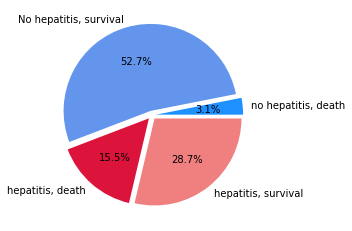

In [14]:
plot1 = hepa.groupby(["HISTOLOGY", "Class"]).size()
print(plot1)
mylabels = ["no hepatitis, death", "No hepatitis, survival", "hepatitis, death", "hepatitis, survival"]
myexplode = [0.05, 0.05, 0.05, 0.05]
mycolors = ["dodgerblue", "CornflowerBlue", "crimson", "lightcoral"]

plt.pie(plot1, labels = mylabels, explode = myexplode, colors = mycolors, autopct='%.1f%%')
plt.show()

Out of the patients who were negative, 4 died anyway, while 68 survived. Out of the patients who had hepatitis, 20 died while only 37 survived.

average age of negative patients: 38.861111111111114
average age of positive patients: 43.26315789473684

average age of dead patients: 45.0
average age of surviving patients: 39.84761904761905

SEX  HISTOLOGY
1    1            62
     2            54
2    1            10
     2             3
dtype: int64


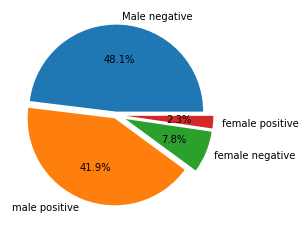

In [15]:
print('average age of negative patients: ' + str(hepa[hepa["HISTOLOGY"]==1]["AGE"].mean()))
print('average age of positive patients: ' + str(hepa[hepa["HISTOLOGY"]==2]["AGE"].mean()))
print("")
print('average age of dead patients: ' + str(hepa[hepa["Class"]==1]["AGE"].mean()))
print('average age of surviving patients: ' + str(hepa[hepa["Class"]==2]["AGE"].mean()))

print("")
plot2 = hepa.groupby(["SEX", "HISTOLOGY"]).size()
print(plot2)

mylabels = ["Male negative", "male positive", "female negative", "female positive"]
myexplode = [0.04, 0.04, 0.12, 0.12]
plt.pie(plot2, labels = mylabels, explode = myexplode, autopct='%.1f%%')
plt.show()

In [16]:
#The diabetes dataset has column names that are not very usefully named.
#Since they were like this in the data reference, we have decided not to change them.
#Note that the class label is F19 and that F1-18 are the results of various tests.
diab.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


The age range of our patients is 7 to 78 years old, with a mean age of 40. For people whose histology was negative, the mean age is 38, while for those for who it was positive, it was 43. This indicates that age may not be a great predictor of hepatitis. Similarly, it appears not to be a great predictor of death.

The majority of our patients is male. However, we notice that the overwhelming proportion of our positive patients are also male. This is a very strong correlation. From this we can conclude that hepatitis is much more common in males than in females.

HISTOLOGY  ANTIVIRALS  Class
2          1           1         1
                       2         4
           2           1        19
                       2        33
dtype: int64


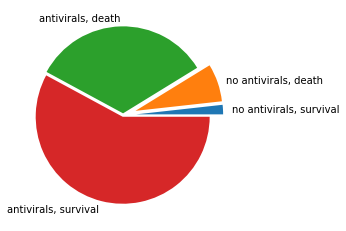

In [17]:
plot3 = hepa[hepa["HISTOLOGY"]==2].groupby(["HISTOLOGY","ANTIVIRALS", "Class"]).size()

print(plot3)

mylabels = ["no antivirals, survival", "no antivirals, death", "antivirals, death", "antivirals, survival"]
myexplode = [0.15, 0.15, 0.02, 0.02]
plt.pie(plot3, labels=mylabels, explode=myexplode)
plt.show()

From this layered partition, we can observe the following facts:

- Out of those who had positive histology, only 5 did not have antivirals. However, out of those 5, only 1 survived. This sample size is small, but it highlights the severity of the disease.

- Out of those who had antivirals, 33/52 surived, which is about 63%. This indicates that the antivirals are key in lowering the death rate, and will likely prove to be a useful feature for our classification needs.

In [18]:
print(diab.groupby(["f1", "f19"]).size())

f1  f19
0   0       32
    1       62
1   0      508
    1      549
dtype: int64


## Task 2: Implementing the models

###KNN

In [19]:
# Helper functions to compute distance of a point x to training set
def euclideanDistance(trainingSet,x):
  return np.sqrt(np.sum((trainingSet-x)**2, axis=1))

def manhattanDistance(trainingSet,x):
  return np.sqrt(np.sum(abs(trainingSet-x), axis=1))

def minkowskiDistance(trainingSet,x): 
  return (np.sum((abs(trainingSet-x))**3, axis=1))**(1/3)


class KNN:
    def __init__(self,dist_fn=euclideanDistance):
        self.K = None 
        self.trainingSet = None 
        self.trainingLabels = None 
        self.dist_fn = dist_fn
    
    # Model fitting: fit function, which takes the training data as well as hyperparameter K as input. 
    # This function should train your model by modifying the model parameters.
    def fit(self, K, trainingSet, trainingLabels):
      self.K = K # Hyperparameter
      self.trainingSet = trainingSet # Numpy array of features (2-dimensional)
      self.trainingLabels = trainingLabels # Numpy array of labels (1-dimensional)
    
    # Prediction: takes a set of input points as input and 
    # outputs predictions for these points.
    def predict(self, testingSet):
      predictedLabels = []
      for x in testingSet:
        distances = self.dist_fn(testingSet, x) # Compute distances of point to training sets
        if (self.K < len(distances)-1):
          neighbours = np.argsort(distances)[:self.K] # Find K closest neighbours
          labels = self.trainingLabels[neighbours] # Labels of closest neighbours
        else: 
          labels = self.trainingLabels 
        classes = np.bincount(labels) 
        majority_class = np.argmax(classes) # Majority class of neighbors
        predictedLabels.append(majority_class)
      return np.array(predictedLabels)


###Decision Trees

The code shown below was taken from the provided tutorial material. 

In [20]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [21]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
          self.num_classes = np.max(labels) + 1
      #below are initialization of the root of the decision tree
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      #to recursively build the rest of the tree
      self._fit_tree(self.root)
      return self

    def _fit_tree(self, node):
      #This gives the condition for termination of the recursion resulting in a leaf node
      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
      #greedily select the best test by minimizing the cost
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
      if np.isinf(cost):
        return
      #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
      #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
      test = node.data[node.data_indices,split_feature] <= split_value
      #store the split feature and value of the node
      node.split_feature = split_feature
      node.split_value = split_value
      #define new nodes which are going to be the left and right child of the present node
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      #recursive call to the _fit_tree()
      self._fit_tree(left)
      self._fit_tree(right)
      #assign the left and right child to present child
      node.left = left
      node.right = right

    def predict(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
      return class_probs  

### Accuracy calculator

In [22]:
def evaluate_acc(trainingLabels, predictedLabels):
  return round(((trainingLabels == predictedLabels).sum())/len(trainingLabels),3)

## Task 3: Running Experiments

### **3.1 Splitting datasets**

Now that the datasets are cleaned, and that our models are constructed, we run our models on the clean data. We first convert the Pandas dataframes to Numpy arrays, and extract the labels for each dataset.

In [23]:
# Convert Pandas Dataframes to Numpy arrays for both datasets
hepaDataset = hepa.iloc[: , 1:].to_numpy() # Remove first column of labels
hepaLabels = hepa["Class"].to_numpy()

diabDataset = diab.iloc[:, :-1].to_numpy() # Remove last column of labels
diabLabels = diab["f19"].to_numpy()


#### 3.1.1 Reserving test data

We reserve a 20\% portion of each dataset as the test data to report the final accuracies of our models. 

In [24]:
def reserveTestSet(dataset, labels, testRatio):
  total = len(dataset)
  numTest = round(total*testRatio)
  testIdx = random.sample(range(total), numTest) # Pick test indices
  remainingIdx = [i for i in range(total) if i not in testIdx] # Remaining indices
  remainingData = dataset[remainingIdx]
  remainingLabels = labels[remainingIdx]
  testData = dataset[testIdx]
  testLabels = labels[testIdx]
  return remainingData, remainingLabels, testData, testLabels
  
testRatio = 0.2 # Proportion of datapoints reserved for testing
heptvSet, heptvLabels, hepaTestSet, hepaTestLabels = reserveTestSet(hepaDataset,hepaLabels,testRatio)
diatvSet, diatvLabels, diabTestSet, diabTestLabels = reserveTestSet(diabDataset,diabLabels,testRatio)

#### 3.1.2 Splitting training and validation sets

We construct a helper function to randomly split the remaining data into training and validation sets. We will use this function later for $L$-fold cross validation. 

In [25]:
#Helper function to randomly split dataset into training / validation sets
# Parameter trainingRatio = proportion of training / (training + validation)
def SplitDataset(dataset,labels,trainingRatio):
  total = len(dataset)
  numTraining = round(total*trainingRatio)
  trainingIdx = random.sample(range(total), numTraining) # Pick training indices
  valIdx = [i for i in range(total) if i not in trainingIdx] # Remaining indices
  trainingSet = dataset[trainingIdx]
  trainingLabels = labels[trainingIdx]
  valSet = dataset[valIdx]
  valLabels = labels[valIdx]
  return trainingSet,  trainingLabels, valSet, valLabels


### **3.2 KNN**

We construct a helper function that performs $L$-fold random split validation on the KNN model with a given training set ratio, a range of $K$ values and a chosen distance function on both datasets. For each dataset, this function then picks the optimal parameter $K_{opt}$ with highest average training accuracy, trains a new model with the non-test data and parameter $K_{opt}$, and evaluates the accuracy of this model on the test data. 

In [26]:
# Helper function to run L-fold cross validation KNN given a trainingRatio, 
# a range of K values, outputs average accuracy for each K hyperparameter value


def crossValidationKNN(Kvalues, trainingRatio, L, dist_fn,
                       heptvSet,heptvLabels,
                       diatvSet,diatvLabels,
                       hepaTestSet,hepaTestLabels,
                       diabTestSet,diabTestLabels):
  avgHepaAcc = []
  avgDiabAcc = []

  # Normalize all features (only for KNN) zero mean unit variance
  heptvSet = (heptvSet-heptvSet.mean(axis=0)) / heptvSet.std(axis=0)
  diatvSet = (diatvSet-diatvSet.mean(axis=0)) / diatvSet.std(axis=0)
  hepaTestSet = (hepaTestSet-hepaTestSet.mean(axis=0)) / hepaTestSet.std(axis=0)
  diabTestSet = (diabTestSet-diabTestSet.mean(axis=0)) / diabTestSet.std(axis=0)  

  for K in Kvalues: 
    hepaAccuracies = []
    diabAccuracies = []

    for crossValidation in range(L):
      # Split dataset into training and validation set
      hepaTrainingSet, hepaTrainingLabels, hepaValSet, hepaValLabels = SplitDataset(heptvSet, heptvLabels, trainingRatio)
      diabTrainingSet, diabTrainingLabels, diabValSet, diabValLabels = SplitDataset(diatvSet, diatvLabels, trainingRatio)

      # Run KNN on Hepa dataset
      hepaKNN = KNN(dist_fn)
      hepaKNN.fit(K, hepaTrainingSet,hepaTrainingLabels)
      hepaPredictedLabels = hepaKNN.predict(hepaValSet)
      hepaAccuracies.append(round(100*evaluate_acc(hepaValLabels,hepaPredictedLabels),1))

      # Run KNN on Diab dataset
      diabKNN = KNN(dist_fn)
      diabKNN.fit(K, diabTrainingSet,diabTrainingLabels)
      diabPredictedLabels = diabKNN.predict(diabValSet)
      diabAccuracies.append(round(100*evaluate_acc(diabValLabels,diabPredictedLabels),1))
    
    # Average out accuracies over all validation sets for each fixed K
    avgHepaAcc.append(round(sum(hepaAccuracies) / len(hepaAccuracies),1))
    avgDiabAcc.append(round(sum(diabAccuracies) / len(diabAccuracies),1))

  # Choose optimal parameters K
  hepaOptK = Kvalues[avgHepaAcc.index(max(avgHepaAcc))]
  diabOptK = Kvalues[avgDiabAcc.index(max(avgDiabAcc))]
    
  # Train models using all non-test data with optimal K, report final accuracies
  hepaOptKNN = KNN(dist_fn)
  hepaOptKNN.fit(hepaOptK, heptvSet, heptvLabels)
  hepaOptPredictedLabels = hepaOptKNN.predict(hepaTestSet)
  hepaTestAcc = round(100*evaluate_acc(hepaTestLabels,hepaOptPredictedLabels),1)

  diabOptKNN = KNN(dist_fn)
  diabOptKNN.fit(diabOptK, diatvSet, diatvLabels)
  diabOptPredictedLabels = diabOptKNN.predict(diabTestSet)
  diabTestAcc = round(100*evaluate_acc(diabTestLabels,diabOptPredictedLabels),1)

  return avgHepaAcc, avgDiabAcc, hepaOptK, diabOptK, hepaTestAcc, diabTestAcc



#### 3.2.1 Euclidean distance function

We start by running the KNN model on each dataset using $10$-fold random split validation, with several $K$ values ranging from 1 to 20, and plot their respective accuracies when using the Euclidean distance function.



In [27]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.75 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = euclideanDistance # Chosen distance function
avgHepaAccEuc, avgDiabAccEuc, hepaOptKEuc, diabOptKEuc, hepaTestAccEuc, diabTestAccEuc = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,heptvSet,heptvLabels,diatvSet,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal K =", hepaOptKEuc,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccEuc),
      "\n\tTest Accuracy =", hepaTestAccEuc)
print("Diabetic Retinopathy:\n\tOptimal K =", diabOptKEuc,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccEuc),
      "\n\tTest Accuracy =", diabTestAccEuc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Hepatitis:
	Optimal K = 14 
	Optimal Training Accuracy = 84.2 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 19 
	Optimal Training Accuracy = 51.9 
	Test Accuracy = 55.7


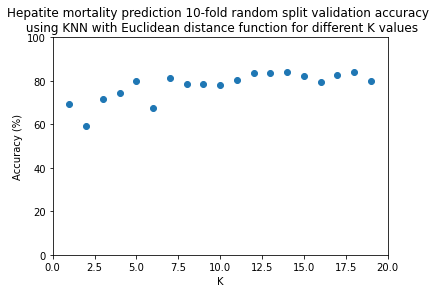

In [28]:
# Hepatite KNN accuracies
plt.plot(Kvalues,avgHepaAccEuc,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using KNN with Euclidean distance function for different K values')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

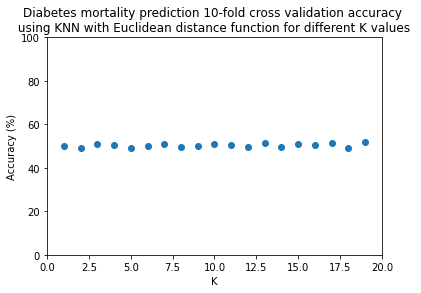

In [29]:
# Diabetes KNN accuracies
plt.plot(Kvalues,avgDiabAccEuc,'o')
plt.title('Diabetes mortality prediction 10-fold cross validation accuracy \n using KNN with Euclidean distance function for different K values ')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

#### 3.2.2 Manhattan distance function


We now run the KNN model on each dataset using $10$-fold cross validation, with several $K$ values ranging from 1 to 20, and plot their respective accuracies when using the Manhattan distance function.

In [30]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.75 # Proportion of training/(training+validation) dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = manhattanDistance # Chosen distance function
avgHepaAccMan, avgDiabAccMan, hepaOptKMan, diabOptKMan, hepaTestAccMan, diabTestAccMan = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,heptvSet, heptvLabels, diatvSet, diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal K =", hepaOptKMan,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccMan),
      "\n\tTest Accuracy =", hepaTestAccMan)
print("Diabetic Retinopathy:\n\tOptimal K =", diabOptKMan,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccMan),
      "\n\tTest Accuracy =", diabTestAccMan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Hepatitis:
	Optimal K = 15 
	Optimal Training Accuracy = 85.0 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 5 
	Optimal Training Accuracy = 51.4 
	Test Accuracy = 55.7


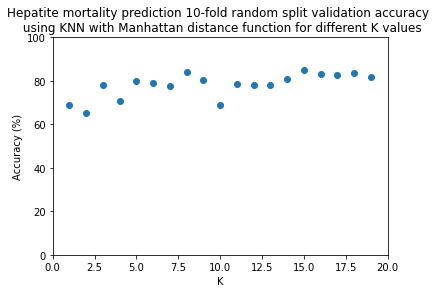

In [31]:
# Hepatite KNN accuracies
plt.plot(Kvalues,avgHepaAccMan,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using KNN with Manhattan distance function for different K values')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

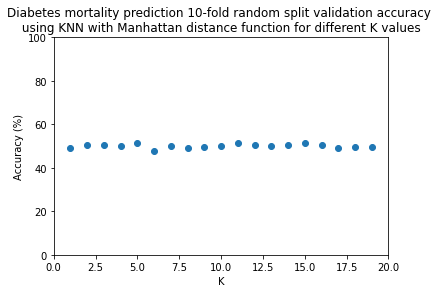

In [32]:
# Diabetes KNN accuracies
plt.plot(Kvalues,avgDiabAccMan,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using KNN with Manhattan distance function for different K values ')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

#### 3.2.3 Minkowski distance function

We now plot the resulting average accuracies of KNN for each hyperparameter $K$ value using the Minkowski distance function with $p=3$.



In [33]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.75 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = minkowskiDistance # Chosen distance function
avgHepaAccMink, avgDiabAccMink, hepaOptKMink, diabOptKMink, hepaTestAccMink, diabTestAccMink = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,heptvSet, heptvLabels, diatvSet, diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal K =", hepaOptKMink,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccMink),
      "\n\tTest Accuracy =", hepaTestAccMink)
print("Diabetic Retinopathy:\n\tOptimal K =", diabOptKMink,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccMink),
      "\n\tTest Accuracy =", diabTestAccMink)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Hepatitis:
	Optimal K = 19 
	Optimal Training Accuracy = 86.2 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 13 
	Optimal Training Accuracy = 53.7 
	Test Accuracy = 55.7


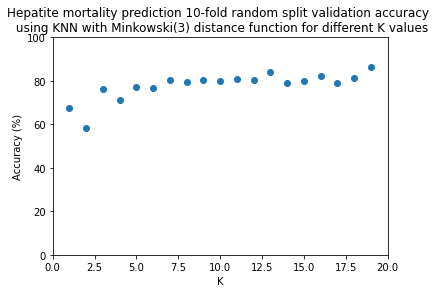

In [34]:
# Hepatite KNN accuracies
plt.plot(Kvalues,avgHepaAccMink,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using KNN with Minkowski(3) distance function for different K values')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

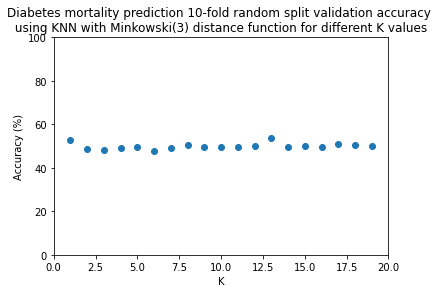

In [35]:
# Diabetes KNN accuracies
plt.plot(Kvalues,avgDiabAccMink,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using KNN with Minkowski(3) distance function for different K values ')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

In [36]:
# from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(n_neighbors=25)
# neigh.fit(diatvSet,diatvLabels)
# prediction = neigh.predict(diatestSet)
# evaluate_acc(prediction,diatestLabels)

#### 3.2.4 Summary

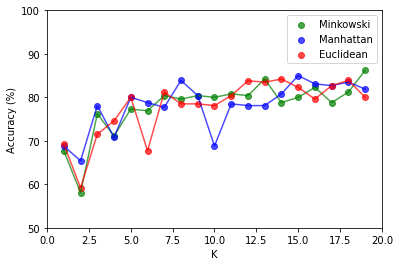

In [37]:
plt.plot()
plt.scatter(Kvalues, avgHepaAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, avgHepaAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, avgHepaAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, avgHepaAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, avgHepaAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, avgHepaAccEuc,'r',alpha=0.7)
#plt.title('Hepatitis mortality prediction 10-fold random split validation accuracy \n using KNN with different distance functions')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(50, 100)
plt.legend()
plt.show()

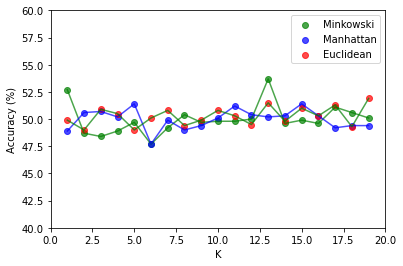

In [38]:
plt.plot()
plt.scatter(Kvalues, avgDiabAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, avgDiabAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, avgDiabAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, avgDiabAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, avgDiabAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, avgDiabAccEuc,'g',alpha=0.7)
#plt.title('Diabetes prediction 10-fold random split validation accuracy \n using KNN with different distance functions')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(40, 60)
plt.legend()
plt.show()

### **3.3 Decision Trees**

We construct a helper function that performs $L$-fold random split validation on the Decision Tree model with a given training set ratio, a range of maximum depth $D$ values and a chosen cost function on both datasets. For each dataset, this function then picks the optimal parameter $D_{opt}$ with highest average validation accuracy, trains a new model with the non-test data and parameter $D_{opt}$, and evaluates the accuracy of this model on the test data. 


In [39]:
# Helper function to run L-fold cross validation DecisionTrees given a trainingRatio
# a range of D values, outputs average accuracy for each depth hyperparameter value
def crossValidationDecisionTrees(Dvalues, trainingRatio, L, dist_fn,
                                 hepaDataset,heptvLabels,diatvSet,diatvLabels,
                                 hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels):
  avgHepaAcc = []
  avgDiabAcc = []

  for d in Dvalues: 
    hepaAccuracies = []
    diabAccuracies = []

    for crossValidation in range(L):
      # Split dataset into training and test set
      hepaTrainingSet, hepaTrainingLabels, hepaTestSet, hepaTestLabels = SplitDataset(heptvSet, heptvLabels, trainingRatio)
      diabTrainingSet, diabTrainingLabels, diabTestSet, diabTestLabels = SplitDataset(diatvSet, diatvLabels, trainingRatio)

      # Run Tree on Hepa dataset
      hepaTree = DecisionTree(max_depth=d)
      hepaTree.fit(hepaTrainingSet, hepaTrainingLabels)
      hepaProbs = hepaTree.predict(hepaTestSet)
      hepaPredictedLabels = np.argmax(hepaProbs,1)
      hepaAccuracy = np.sum(hepaPredictedLabels == hepaTestLabels)/len(hepaTestLabels)
      hepaAccuracy = round(hepaAccuracy*100,1)
      hepaAccuracies.append(hepaAccuracy)

      # Run Tree on Diab dataset
      diabTree = DecisionTree(max_depth=d)
      diabTree.fit(diabTrainingSet,diabTrainingLabels)
      diabProbs = diabTree.predict(diabTestSet)
      diabPredictedLabels = np.argmax(diabProbs,1)
      diabAccuracy = np.sum(diabPredictedLabels == diabTestLabels)/len(diabTestLabels)
      diabAccuracy = round(diabAccuracy*100,1)
      diabAccuracies.append(diabAccuracy)

    # Average out accuracies over all validation sets for each fixed D
    avgHepaAcc.append(round(sum(hepaAccuracies) / len(hepaAccuracies),1))
    avgDiabAcc.append(round(sum(diabAccuracies) / len(diabAccuracies),1))

  # Choose optimal parameters D
  hepaOptD = Dvalues[avgHepaAcc.index(max(avgHepaAcc))]
  diabOptD = Dvalues[avgDiabAcc.index(max(avgDiabAcc))]
    
  # Train models using all non-test data with optimal D, report final accuracies
  hepaOptTree = DecisionTree(max_depth=hepaOptD)
  hepaOptTree.fit(heptvSet,heptvLabels)
  hepaProbs = hepaOptTree.predict(hepaTestSet)
  hepaPredictedLabels = np.argmax(hepaProbs,1)
  hepaTestAcc = round(100*np.sum(hepaPredictedLabels == hepaTestLabels)/len(hepaTestLabels),1)
  
  diabOptTree = DecisionTree(max_depth=diabOptD)
  diabOptTree.fit(diatvSet,diatvLabels)
  diabProbs = diabOptTree.predict(diabTestSet)
  diabPredictedLabels = np.argmax(diabProbs,1)
  diabTestAcc = round(100*np.sum(diabPredictedLabels == diabTestLabels)/len(diabTestLabels),1)
  
  return avgHepaAcc, avgDiabAcc, hepaOptD, diabOptD, hepaTestAcc, diabTestAcc


#### 3.3.1 Misclassification cost function

We now plot the resulting average accuracies of Decision Tree classification for each maximum depth $D$ hyperparameter value using the misclassification cost function for both datasets.

In [40]:
Dvalues = range(1,10) # Range of values of hyperparameter D we will test
trainingRatio = 0.75 # Proportion of training/total dataset sizes
L = 10  # Number of various training/test set permutations
cost_fn = cost_misclassification
avgHepaAccMisc, avgDiabAccMisc, hepaOptDMisc, diabOptDMisc, hepaTestAccMisc, diabTestAccMisc = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    heptvSet,heptvLabels,diatvSet,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal D =", hepaOptDMisc,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccMisc),
      "\n\tTest Accuracy =", hepaTestAccMisc)
print("Diabetic Retinopathy:\n\tOptimal D =", diabOptDMisc,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccMisc),
      "\n\tTest Accuracy =", diabTestAccMisc)

Hepatitis:
	Optimal D = 5 
	Optimal Training Accuracy = 84.2 
	Test Accuracy = 96.2
Diabetic Retinopathy:
	Optimal D = 9 
	Optimal Training Accuracy = 63.4 
	Test Accuracy = 76.5


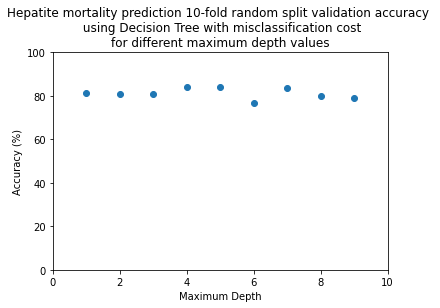

In [41]:
# Hepa Decision Tree Misclassification cost
plt.plot(Dvalues,avgHepaAccMisc,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using Decision Tree with misclassification cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()


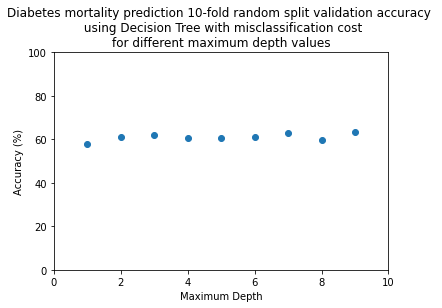

In [42]:
# Diab Decision Tree Misclassification cost
plt.plot(Dvalues,avgDiabAccMisc,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using Decision Tree with misclassification cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()

#### 3.3.2 Entropy cost function

We now plot the resulting average accuracies of Decision Tree classification for each maximum depth $D$ hyperparameter value using the entropy cost function for both datasets.

In [43]:
Dvalues = range(1,10) # Range of values of hyperparameter D we will test
trainingRatio = 0.75 # Proportion of training/total dataset sizes
L = 10  # Number of various training/test set permutations
cost_fn = cost_entropy
avgHepaAccEnt, avgDiabAccEnt, hepaOptDEnt, diabOptDEnt, hepaTestAccEnt, diabTestAccEnt = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    heptvSet,heptvLabels,diatvSet,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal D =", hepaOptDEnt,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccEnt),
      "\n\tTest Accuracy =", hepaTestAccEnt)
print("Diabetic Retinopathy:\n\tOptimal D =", diabOptDEnt,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccMisc),
      "\n\tTest Accuracy =", diabTestAccEnt)



Hepatitis:
	Optimal D = 3 
	Optimal Training Accuracy = 84.6 
	Test Accuracy = 92.3
Diabetic Retinopathy:
	Optimal D = 5 
	Optimal Training Accuracy = 63.4 
	Test Accuracy = 63.5


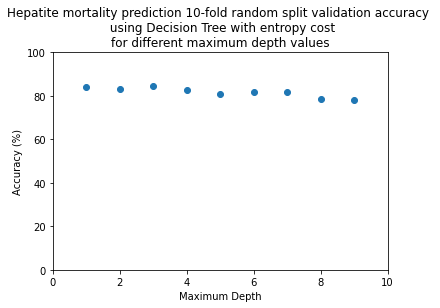

In [44]:
# Hepa Decision Tree Entropy cost
plt.plot(Dvalues,avgHepaAccEnt,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using Decision Tree with entropy cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()


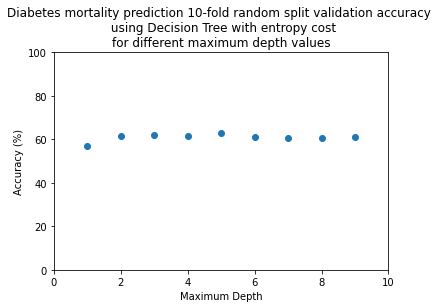

In [45]:
# Diab Decision Tree Entropy cost
plt.plot(Dvalues,avgDiabAccEnt,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using Decision Tree with entropy cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()

#### 3.3.3 Gini index cost function

We now plot the resulting average accuracies of Decision Tree classification for each maximum depth $D$ hyperparameter value using the Gini index cost function for both datasets.

In [46]:
Dvalues = range(1,10) # Range of values of hyperparameter D we will test
trainingRatio = 0.75 # Proportion of training/total dataset sizes
L = 10  # Number of various training/test set permutations
cost_fn = cost_gini_index
avgHepaAccGini, avgDiabAccGini, hepaOptDGini, diabOptDGini, hepaTestAccGini, diabTestAccGini = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    heptvSet,heptvLabels,diatvSet,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal D =", hepaOptDGini,
      "\n\tOptimal Training Accuracy =", max(avgHepaAccGini),
      "\n\tTest Accuracy =", hepaTestAccGini)
print("Diabetic Retinopathy:\n\tOptimal D =", diabOptDGini,
      "\n\tOptimal Training Accuracy =", max(avgDiabAccGini),
      "\n\tTest Accuracy =", diabTestAccGini)

Hepatitis:
	Optimal D = 4 
	Optimal Training Accuracy = 83.5 
	Test Accuracy = 96.2
Diabetic Retinopathy:
	Optimal D = 8 
	Optimal Training Accuracy = 62.7 
	Test Accuracy = 73.5


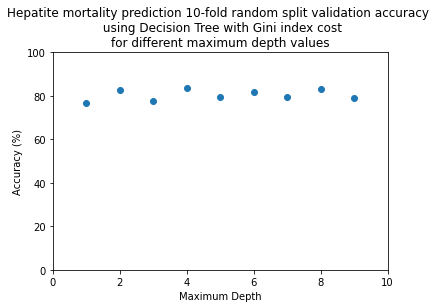

In [47]:
# Hepa Decision Tree Gini index cost
plt.plot(Dvalues,avgHepaAccGini,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using Decision Tree with Gini index cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()


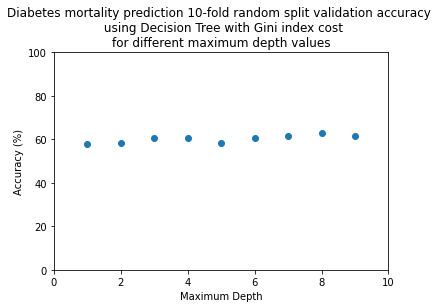

In [48]:
# Diab Decision Tree Gini index cost
plt.plot(Dvalues,avgDiabAccGini,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using Decision Tree with Gini index cost\nfor different maximum depth values')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()

#### 3.3.4 Summary

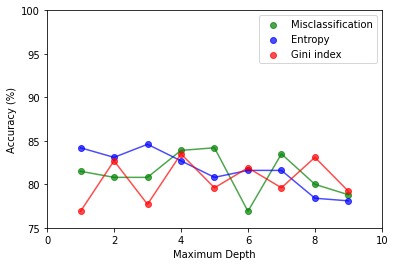

In [49]:
plt.plot()
plt.scatter(Dvalues, avgHepaAccMisc,label='Misclassification',c='g',alpha=0.7)
plt.plot(Dvalues, avgHepaAccMisc,'g',alpha=0.7)
plt.scatter(Dvalues, avgHepaAccEnt,label='Entropy',c='b',alpha=0.7)
plt.plot(Dvalues, avgHepaAccEnt,'b',alpha=0.7)
plt.scatter(Dvalues, avgHepaAccGini, label='Gini index',c='r',alpha=0.7)
plt.plot(Dvalues, avgHepaAccGini,'r',alpha=0.7)
#plt.title('Hepatitis mortality prediction 10-fold random split validation accuracy \n using Decision Tree with different cost functions')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, max(Dvalues)+1)
plt.ylim(75, 100)
plt.legend()
plt.show()

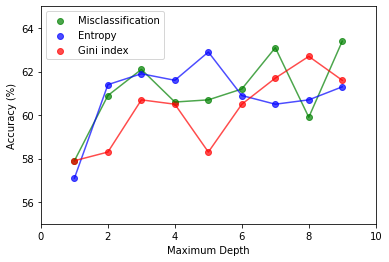

In [50]:
plt.plot()
plt.scatter(Dvalues, avgDiabAccMisc,label='Misclassification',c='g',alpha=0.7)
plt.plot(Dvalues, avgDiabAccMisc,'g',alpha=0.7)
plt.scatter(Dvalues, avgDiabAccEnt,label='Entropy',c='b',alpha=0.7)
plt.plot(Dvalues, avgDiabAccEnt,'b',alpha=0.7)
plt.scatter(Dvalues, avgDiabAccGini, label='Gini index',c='r',alpha=0.7)
plt.plot(Dvalues, avgDiabAccGini,'r',alpha=0.7)
#plt.title('Diabetic Retinopathy prediction 10-fold random split validation accuracy \n using Decision Tree with different cost functions')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, max(Dvalues)+1)
plt.ylim(55, 65)
plt.legend()
plt.show()

### 3.4 Decision boundaries

We first find the two continuous features with highest correlation with class label in the Hepatitis dataset. 

Note that for the Diabetic Retinopathy dataset, the columns f2-f15 represent the same measurement of MA detection, but at different confidence levels. We cannot use both f2 and f3 (the features with highest correlation to class label f19) for the decision boundary. We cannot either use columns f0, f1 and f18 as they represent categorical data. We are therefore left with f17, which has an extremely low correlation of 0.03 with the class label. From this, we choose not to display the decision boundary for the diabetic retinopathy dataset. 

In [51]:
hepaCorrelations = abs(hepa.corr()['Class']) # Compute correlations with label
print(hepaCorrelations) # 13="BILIRUBIN", 15="ALBUMIN"

x_train = heptvSet[:,[13,15]] # Pick 2 most correlated features 
x_test = hepaTestSet[:,[13,15]]
y_train = heptvLabels
y_test = hepaTestLabels


Class              1.000000
AGE                0.167945
SEX                0.160049
STEROID            0.033437
ANTIVIRALS         0.110856
FATIGUE            0.266333
MALAISE            0.323577
ANOREXIA           0.157056
LIVER BIG          0.118612
LIVER FIRM         0.048426
SPLEEN PALPABLE    0.193653
SPIDERS            0.402416
ASCITES            0.520441
VARICES            0.402657
BILIRUBIN          0.506906
SGOT               0.051151
ALBUMIN            0.482372
HISTOLOGY          0.376876
Name: Class, dtype: float64


We can now visualize the distribution of the Hepatitis dataset according to these two features. We crop out patient data with extremely high Bilirubin values to improve visualization quality.

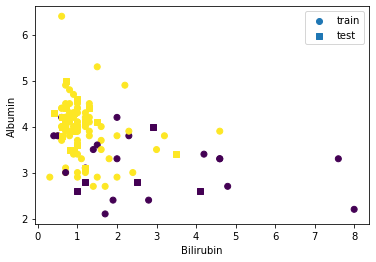

In [52]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='o',label='train')
plt.scatter(x_test[:,0], x_test[:,1],c=y_test,marker='s',label='test')
plt.legend()
plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
#plt.title("Hepatitis dataset distribution of two highest correlated features")
plt.show()


We now plot the KNN classification prediction for the Euclidean distance function and optimal parameter $K_{opt}$ with the two features with highest correlation for the Hepatitis dataset.  

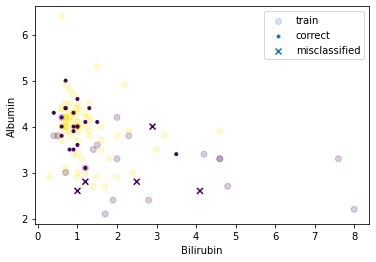

In [53]:
# Train KNN using all non-test data with optimal K
model = KNN(euclideanDistance)
model.fit(hepaOptKEuc, x_train, y_train)
y_pred = model.predict(x_test)
#accuracy = round(100*evaluate_acc(y_test,y_pred),1)

correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
#for i in range(x_test.shape[0]):
#    for k in range(model.K):
#        hor = x_test[i,0], x_train[knns[i,k],0]
#        ver = x_test[i,1], x_train[knns[i,k],1]
#        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
#plt.title("Hepatitis dataset classification\nwith two highest correlated features")
plt.legend()
plt.show()


In [54]:
print(hepaOptKEuc)

14


#### 3.4.1 KNN Decision Boundary

We can now visualize the decision boundary of KNN for the Euclidean distance function and optimal parameter $K_{opt}$ with the two features with highest correlation for the Hepatitis dataset.  

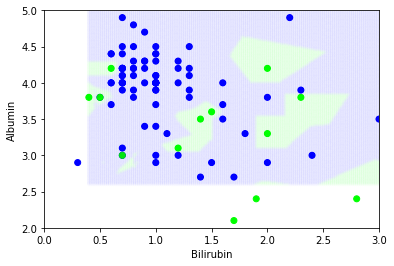

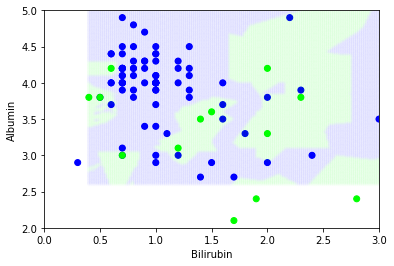

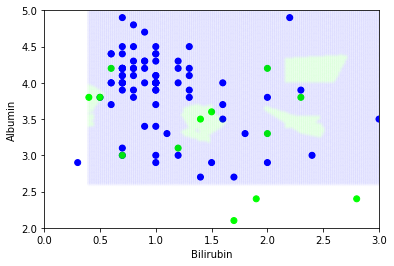

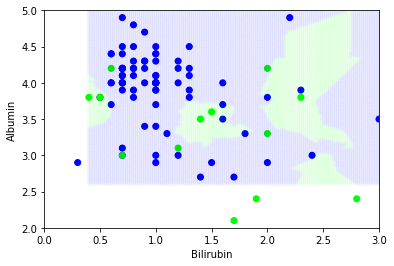

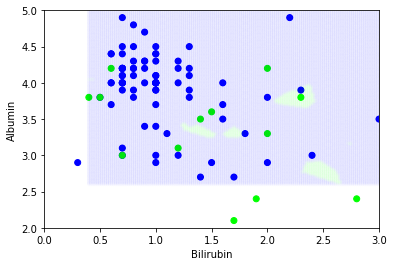

In [55]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_test[:,0]), np.max(x_test[:,0]), 200)
x1v = np.linspace(np.min(x_test[:,1]), np.max(x_test[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
C = 3

for k in range(1,6):
  model = KNN(euclideanDistance)
  model.fit(k, x_train, y_train)
  y_pred = model.predict(x_test)

  y_train_prob = np.zeros((y_train.shape[0], 3))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  num_test = x_all.shape[0]
  euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
  distances = euclidean(x_train[None,:,:], x_all[:,None,:])
  knns = np.zeros((num_test, k), dtype=int)
  y_prob = np.zeros((num_test, C))
  for i in range(num_test):
      knns[i,:] = np.argsort(distances[i])[:k]
      y_prob[i,:] = np.bincount(y_train[knns[i,:]], minlength=C) 
  y_prob /= k

  y_pred = np.zeros_like(y_prob)
  y_pred[np.arange(x_all.shape[0]), np.argmax(y_prob, axis=-1)] = 1

  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred, marker='.', alpha=0.01)
  plt.ylabel('Albumin')
  plt.xlabel('Bilirubin')
  #plt.title(f'Hepatitis dataset KNN decision boundary\nwith Euclidean distance and K = {k}')
  plt.xlim(0,3)
  plt.ylim(2,5)
  plt.show()

#### 3.4.2 Decision Tree Decision Boundary

We also plot the Decision Tree decision boundary for the misclassification cost function and optimal parameter $D_{opt}$ with the two features with highest correlation for the Hepatitis dataset.


accuracy is 80.8.


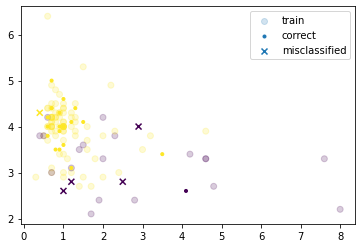

In [56]:
tree = DecisionTree(max_depth=hepaOptDMisc)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

In [57]:
print(hepaOptDMisc)

5


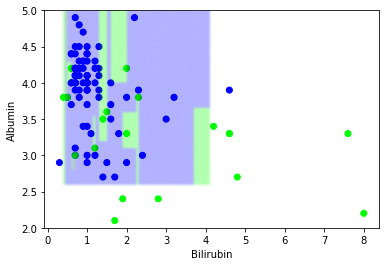

In [58]:
x=x_test
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=200)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
plt.ylim(2,5)
plt.show()

accuracy is 84.6.


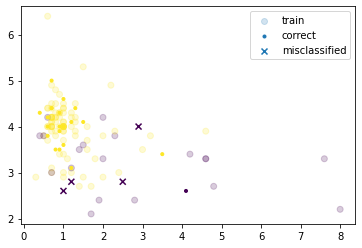

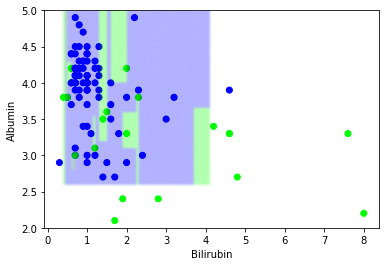

In [59]:
tree = DecisionTree(max_depth=1)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

x=x_test
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=200)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
plt.ylim(2,5)
plt.show()


### 3.5 Feature Selection

We compute the correlation of each feature with the associated class label, and  then pick the two features which are most correlated with the label for each dataset



In [60]:
# Compute correlations with label
hepaCorrelations = abs(hepa.corr()['Class'])
diabCorrelations = abs(diab.corr()['f19'])

print(hepaCorrelations) # 12="ASCITES", 14="BILIRUBIN"
print(diabCorrelations) # 2="f2", 3="f3"

# Pick only 2 most correlated features in each dataset
fHepaDataset = heptvSet[:,[11,13]]
fDiabDataset = diatvSet[:,[2,3]]

Class              1.000000
AGE                0.167945
SEX                0.160049
STEROID            0.033437
ANTIVIRALS         0.110856
FATIGUE            0.266333
MALAISE            0.323577
ANOREXIA           0.157056
LIVER BIG          0.118612
LIVER FIRM         0.048426
SPLEEN PALPABLE    0.193653
SPIDERS            0.402416
ASCITES            0.520441
VARICES            0.402657
BILIRUBIN          0.506906
SGOT               0.051151
ALBUMIN            0.482372
HISTOLOGY          0.376876
Name: Class, dtype: float64
f0     0.062816
f1     0.076925
f2     0.292603
f3     0.266338
f4     0.234691
f5     0.197511
f6     0.161631
f7     0.127861
f8     0.058015
f9     0.000479
f10    0.038281
f11    0.104254
f12    0.142273
f13    0.151424
f14    0.184772
f15    0.177313
f16    0.008466
f17    0.030868
f18    0.042144
f19    1.000000
Name: f19, dtype: float64


#### 3.5.1 Double-feature KNN
We then run KNN $10$-fold random split correlation on this truncated dataset with Euclidean distance function to obtain the optimal $K$ parameter which maximizes the validation accuracy. 

In [61]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.8 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = euclideanDistance # Chosen distance function
favgHepaAccEuc, favgDiabAccEuc, fhepaOptKEuc, fdiabOptKEuc, fhepaTestAccEuc, fdiabTestAccEuc = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    fHepaDataset,heptvLabels,fDiabDataset,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal K =", fhepaOptKEuc,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccEuc),
      "\n\tTest Accuracy =", fhepaTestAccEuc)
print("Diabetic Retinopathy:\n\tOptimal K =", fdiabOptKEuc,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccEuc),
      "\n\tTest Accuracy =", fdiabTestAccEuc)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Hepatitis:
	Optimal K = 19 
	Optimal Training Accuracy = 85.2 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 10 
	Optimal Training Accuracy = 52.5 
	Test Accuracy = 55.7


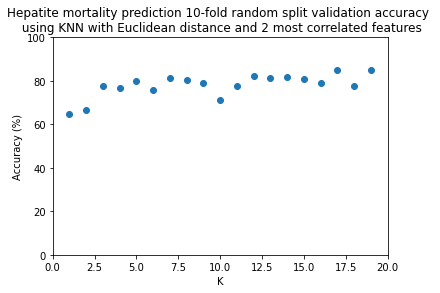

In [62]:
# Hepatite 2-features KNN accuracies
plt.plot(Kvalues,favgHepaAccEuc,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using KNN with Euclidean distance and 2 most correlated features')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

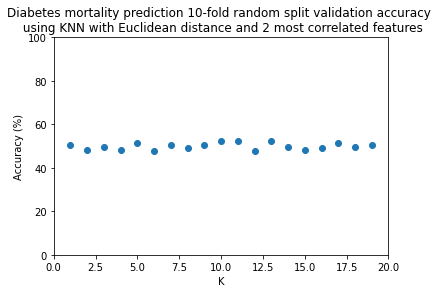

In [63]:
# Diabetes 2-features KNN accuracies
plt.plot(Kvalues,favgDiabAccEuc,'o')
plt.title('Diabetes mortality prediction 10-fold random split validation accuracy \n using KNN with Euclidean distance and 2 most correlated features')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

In [64]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.8 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = euclideanDistance # Chosen distance function
favgHepaAccEuc, favgDiabAccEuc, fhepaOptKEuc, fdiabOptKEuc, fhepaTestAccEuc, fdiabTestAccEuc = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    fHepaDataset,heptvLabels,fDiabDataset,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)
dist_fn = manhattanDistance
favgHepaAccMan, favgDiabAccMan, fhepaOptKMan, fdiabOptKMan, fhepaTestAccMan, fdiabTestAccMan = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,heptvSet, heptvLabels, diatvSet, diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)
dist_fn = minkowskiDistance
favgHepaAccMink, favgDiabAccMink, fhepaOptKMink, fdiabOptKMink, fhepaTestAccMink, fdiabTestAccMink = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,heptvSet, heptvLabels, diatvSet, diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [65]:
print("Euclidean")
print("Hepatitis:\n\tOptimal K =", fhepaOptKEuc,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccEuc),
      "\n\tTest Accuracy =", fhepaTestAccEuc)
print("Diabetic Retinopathy:\n\tOptimal K =", fdiabOptKEuc,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccEuc),
      "\n\tTest Accuracy =", fdiabTestAccEuc)

print("Manhattan")
print("Hepatitis:\n\tOptimal K =", fhepaOptKMan,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccMan),
      "\n\tTest Accuracy =", fhepaTestAccMan)
print("Diabetic Retinopathy:\n\tOptimal K =", fdiabOptKMan,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccMan),
      "\n\tTest Accuracy =", fdiabTestAccMan)

print("Minkowski")
print("Hepatitis:\n\tOptimal K =", fhepaOptKMink,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccMink),
      "\n\tTest Accuracy =", fhepaTestAccMink)
print("Diabetic Retinopathy:\n\tOptimal K =", fdiabOptKMink,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccMink),
      "\n\tTest Accuracy =", fdiabTestAccMink)

Euclidean
Hepatitis:
	Optimal K = 14 
	Optimal Training Accuracy = 86.7 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 19 
	Optimal Training Accuracy = 55.0 
	Test Accuracy = 55.7
Manhattan
Hepatitis:
	Optimal K = 16 
	Optimal Training Accuracy = 83.4 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 16 
	Optimal Training Accuracy = 53.4 
	Test Accuracy = 55.7
Minkowski
Hepatitis:
	Optimal K = 10 
	Optimal Training Accuracy = 85.7 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 15 
	Optimal Training Accuracy = 52.5 
	Test Accuracy = 55.7


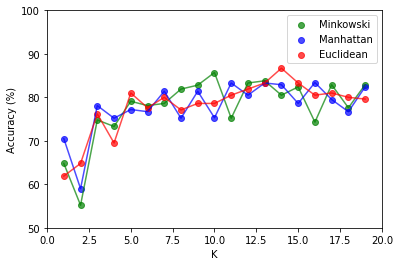

In [66]:
plt.plot()
plt.scatter(Kvalues, favgHepaAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, favgHepaAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, favgHepaAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, favgHepaAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, favgHepaAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, favgHepaAccEuc,'r',alpha=0.7)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(50, 100)
plt.legend()
plt.show()

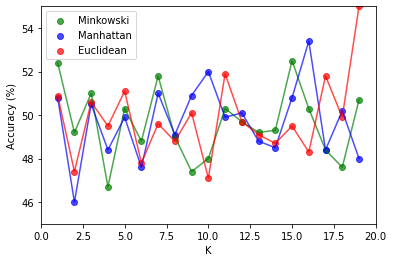

In [67]:
plt.plot()
plt.scatter(Kvalues, favgDiabAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, favgDiabAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, favgDiabAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, favgDiabAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, favgDiabAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, favgDiabAccEuc,'r',alpha=0.7)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(45, 55)
plt.legend()
plt.show()

#### 3.5.2 Double-feature Decision Tree

We then run KNN $10$-fold random split correlation on this truncated dataset with Euclidean distance function to obtain the optimal $K$ parameter which maximizes the validation accuracy. 

In [68]:
Dvalues = range(1,8) # Range of values of hyperparameter D we will test
trainingRatio = 0.8 # Proportion of training/total dataset sizes
L = 5  # Number of various training/test set permutations
cost_fn = cost_misclassification
favgHepaAccMisc, favgDiabAccMisc, fhepaOptDMisc, fdiabOptDMisc, fhepaTestAccMisc, fdiabTestAccMisc = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    fHepaDataset,heptvLabels,fDiabDataset,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal D =", fhepaOptDMisc,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccMisc),
      "\n\tTest Accuracy =", fhepaTestAccMisc)
print("Diabetic Retinopathy:\n\tOptimal D =", fdiabOptDMisc,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccMisc),
      "\n\tTest Accuracy =", fdiabTestAccMisc)


Hepatitis:
	Optimal D = 5 
	Optimal Training Accuracy = 81.9 
	Test Accuracy = 100.0
Diabetic Retinopathy:
	Optimal D = 7 
	Optimal Training Accuracy = 66.1 
	Test Accuracy = 63.6


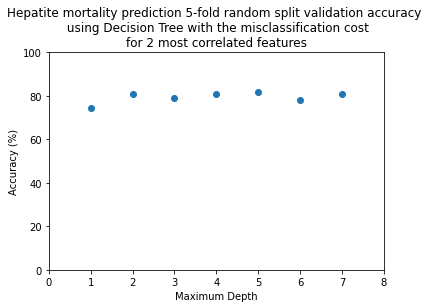

In [69]:
# Hepa Decision Tree Misclassification cost
plt.plot(Dvalues,favgHepaAccMisc,'o')
plt.title('Hepatite mortality prediction 5-fold random split validation accuracy \n using Decision Tree with the misclassification cost\nfor 2 most correlated features')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()


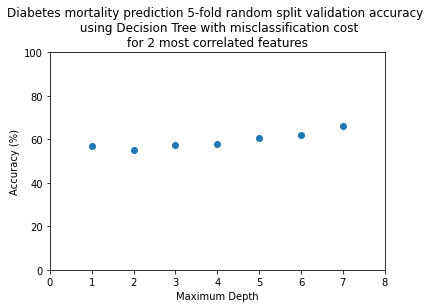

In [70]:
# Diab Decision Tree Misclassification cost
plt.plot(Dvalues,favgDiabAccMisc,'o')
plt.title('Diabetes mortality prediction 5-fold random split validation accuracy \n using Decision Tree with misclassification cost\nfor 2 most correlated features')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 1+max(Dvalues))
plt.ylim(0, 100)
plt.show()

In [71]:
cost_fn = cost_entropy
favgHepaAccEnt, favgDiabAccEnt, fhepaOptDEnt, fdiabOptDEnt, fhepaTestAccEnt, fdiabTestAccEnt = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    fHepaDataset,heptvLabels,fDiabDataset,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

cost_fn = cost_gini_index
favgHepaAccGini, favgDiabAccGini, fhepaOptDGini, fdiabOptDGini, fhepaTestAccGini, fdiabTestAccGini = crossValidationDecisionTrees(
    Dvalues, trainingRatio, L, dist_fn,
    fHepaDataset,heptvLabels,fDiabDataset,diatvLabels,
    hepaTestSet,hepaTestLabels,diabTestSet,diabTestLabels)

In [72]:
print("Misclassification")
print("Hepatitis:\n\tOptimal D =", fhepaOptDMisc,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccMisc),
      "\n\tTest Accuracy =", fhepaTestAccMisc)
print("Diabetic Retinopathy:\n\tOptimal D =", fdiabOptDMisc,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccMisc),
      "\n\tTest Accuracy =", fdiabTestAccMisc)

print("Entropy")
print("Hepatitis:\n\tOptimal D =", fhepaOptDEnt,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccEnt),
      "\n\tTest Accuracy =", fhepaTestAccEnt)
print("Diabetic Retinopathy:\n\tOptimal D =", fdiabOptDEnt,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccEnt),
      "\n\tTest Accuracy =", fdiabTestAccEnt)

print("Gini index")
print("Hepatitis:\n\tOptimal D =", fhepaOptDGini,
      "\n\tOptimal Training Accuracy =", max(favgHepaAccGini),
      "\n\tTest Accuracy =", fhepaTestAccGini)
print("Diabetic Retinopathy:\n\tOptimal D =", fdiabOptDGini,
      "\n\tOptimal Training Accuracy =", max(favgDiabAccGini),
      "\n\tTest Accuracy =", fdiabTestAccGini)

Misclassification
Hepatitis:
	Optimal D = 5 
	Optimal Training Accuracy = 81.9 
	Test Accuracy = 100.0
Diabetic Retinopathy:
	Optimal D = 7 
	Optimal Training Accuracy = 66.1 
	Test Accuracy = 63.6
Entropy
Hepatitis:
	Optimal D = 1 
	Optimal Training Accuracy = 82.9 
	Test Accuracy = 90.5
Diabetic Retinopathy:
	Optimal D = 7 
	Optimal Training Accuracy = 63.8 
	Test Accuracy = 67.4
Gini index
Hepatitis:
	Optimal D = 4 
	Optimal Training Accuracy = 90.5 
	Test Accuracy = 95.2
Diabetic Retinopathy:
	Optimal D = 7 
	Optimal Training Accuracy = 62.1 
	Test Accuracy = 63.6


### 3.6 Correlation-weighted features

As a potential improvement to our KNN model, we normalize the features of both dataset, then weigh each feature by its correlation with the class label on the training data. 

In [73]:
# Convert non-test data back to Pandas Dataframes
hepaDF = pd.DataFrame(data=heptvSet)
diabDF = pd.DataFrame(data=diatvSet)
hepaDF["CLASS"] = heptvLabels
diabDF["CLASS"] = diatvLabels

# Compute cross-correlations 
hepaCorr = list(abs(hepaDF.corr()['CLASS']))[:-1]
diabCorr = list(abs(diabDF.corr()['CLASS']))[:-1]

# Normalize feature values and multiply by their respective correlation 
NormHeptvSet = hepaCorr * (heptvSet-heptvSet.mean(axis=0)) / heptvSet.std(axis=0)
NormDiatvSet = diabCorr * (diatvSet-diatvSet.mean(axis=0)) / diatvSet.std(axis=0)
NormHepaTestSet = hepaCorr * (hepaTestSet-hepaTestSet.mean(axis=0)) / hepaTestSet.std(axis=0)
NormDiabTestSet = diabCorr * (diabTestSet-diabTestSet.mean(axis=0)) / diabTestSet.std(axis=0) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


We then run KNN on the correlation-weighted data and display the resulting test accuracy. 


In [74]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.8 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations
dist_fn = euclideanDistance # Chosen distance function
NavgHepaAccEuc, NavgDiabAccEuc, NhepaOptKEuc, NdiabOptKEuc, NhepaTestAccEuc, NdiabTestAccEuc = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    NormHeptvSet,heptvLabels,NormDiatvSet,diatvLabels,
    NormHepaTestSet,hepaTestLabels,NormDiabTestSet,diabTestLabels)

print("Hepatitis:\n\tOptimal K =", NhepaOptKEuc,
      "\n\tOptimal Training Accuracy =", max(NavgHepaAccEuc),
      "\n\tTest Accuracy =", NhepaTestAccEuc)
print("Diabetic Retinopathy:\n\tOptimal K =", NdiabOptKEuc,
      "\n\tOptimal Training Accuracy =", max(NavgDiabAccEuc),
      "\n\tTest Accuracy =", NdiabTestAccEuc)



Hepatitis:
	Optimal K = 17 
	Optimal Training Accuracy = 86.2 
	Test Accuracy = 80.8
Diabetic Retinopathy:
	Optimal K = 17 
	Optimal Training Accuracy = 53.5 
	Test Accuracy = 55.7


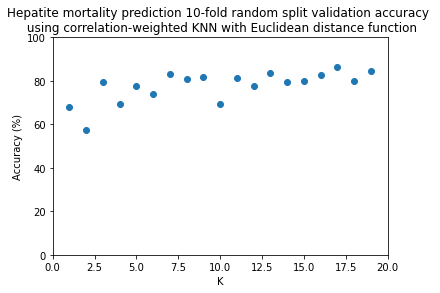

In [75]:
# Hepatite KNN accuracies
plt.plot(Kvalues,NavgHepaAccEuc,'o')
plt.title('Hepatite mortality prediction 10-fold random split validation accuracy \n using correlation-weighted KNN with Euclidean distance function')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

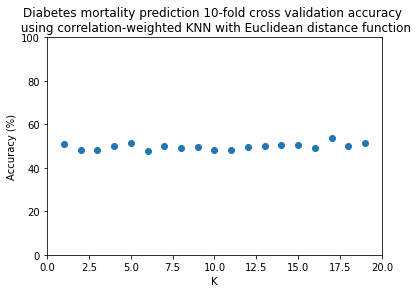

In [76]:
# Diabetes KNN accuracies
plt.plot(Kvalues,NavgDiabAccEuc,'o')
plt.title('Diabetes mortality prediction 10-fold cross validation accuracy \n using correlation-weighted KNN with Euclidean distance function')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

In [77]:
Kvalues = range(1,20) # Range of values of hyperparameter K we will test
trainingRatio = 0.8 # Proportion of training/total dataset sizes
L = 10 # Number of various training/test set permutations

dist_fn = euclideanDistance # Chosen distance function
NavgHepaAccEuc, NavgDiabAccEuc, NhepaOptKEuc, NdiabOptKEuc, NhepaTestAccEuc, NdiabTestAccEuc = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    NormHeptvSet,heptvLabels,NormDiatvSet,diatvLabels,
    NormHepaTestSet,hepaTestLabels,NormDiabTestSet,diabTestLabels)

dist_fn = manhattanDistance
NavgHepaAccMan, NavgDiabAccMan, NhepaOptKMan, NdiabOptKMan, NhepaTestAccMan, NdiabTestAccMan = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    NormHeptvSet,heptvLabels,NormDiatvSet,diatvLabels,
    NormHepaTestSet,hepaTestLabels,NormDiabTestSet,diabTestLabels)

dist_fn = minkowskiDistance
NavgHepaAccMink, NavgDiabAccMink, NhepaOptKMink, NdiabOptKMink, NhepaTestAccMink, NdiabTestAccMink = crossValidationKNN(
    Kvalues,trainingRatio,L,dist_fn,
    NormHeptvSet,heptvLabels,NormDiatvSet,diatvLabels,
    NormHepaTestSet,hepaTestLabels,NormDiabTestSet,diabTestLabels)


In [78]:
print("HEPA")
print("Euclidean")
print("Hepatitis:\n\tOptimal K =", NhepaOptKEuc,
      "\n\tOptimal Training Accuracy =", max(NavgHepaAccEuc),
      "\n\tTest Accuracy =", NhepaTestAccEuc)

print("Manhattan")
print("Hepatitis:\n\tOptimal K =", NhepaOptKMan,
      "\n\tOptimal Training Accuracy =", max(NavgHepaAccMan),
      "\n\tTest Accuracy =", NhepaTestAccMan)

print("Minkowski")
print("Hepatitis:\n\tOptimal K =", NhepaOptKMink,
      "\n\tOptimal Training Accuracy =", max(NavgHepaAccMink),
      "\n\tTest Accuracy =", NhepaTestAccMink)

print("DIAB")
print("Euclidean")
print("Hepatitis:\n\tOptimal K =", NdiabOptKEuc,
      "\n\tOptimal Training Accuracy =", max(NavgDiabAccEuc),
      "\n\tTest Accuracy =", NdiabTestAccEuc)

print("Manhattan")
print("Hepatitis:\n\tOptimal K =", NdiabOptKMan,
      "\n\tOptimal Training Accuracy =", max(NavgDiabAccMan),
      "\n\tTest Accuracy =", NdiabTestAccMan)

print("Minkowski")
print("Hepatitis:\n\tOptimal K =", NdiabOptKMink,
      "\n\tOptimal Training Accuracy =", max(NavgDiabAccMink),
      "\n\tTest Accuracy =", NdiabTestAccMink)

HEPA
Euclidean
Hepatitis:
	Optimal K = 9 
	Optimal Training Accuracy = 84.8 
	Test Accuracy = 80.8
Manhattan
Hepatitis:
	Optimal K = 18 
	Optimal Training Accuracy = 84.8 
	Test Accuracy = 80.8
Minkowski
Hepatitis:
	Optimal K = 16 
	Optimal Training Accuracy = 86.7 
	Test Accuracy = 80.8
DIAB
Euclidean
Hepatitis:
	Optimal K = 9 
	Optimal Training Accuracy = 53.2 
	Test Accuracy = 55.7
Manhattan
Hepatitis:
	Optimal K = 9 
	Optimal Training Accuracy = 53.9 
	Test Accuracy = 55.7
Minkowski
Hepatitis:
	Optimal K = 11 
	Optimal Training Accuracy = 52.7 
	Test Accuracy = 55.7


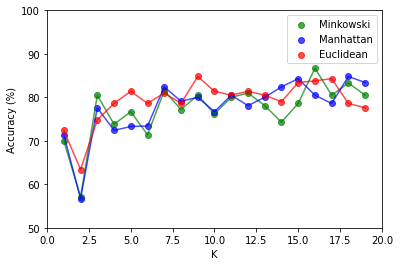

In [79]:
plt.plot()
plt.scatter(Kvalues, NavgHepaAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, NavgHepaAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, NavgHepaAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, NavgHepaAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, NavgHepaAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, NavgHepaAccEuc,'r',alpha=0.7)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(50, 100)
plt.legend()
plt.show()

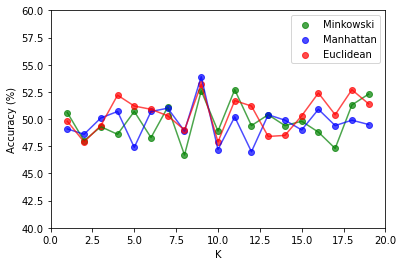

In [80]:
plt.plot()
plt.scatter(Kvalues, NavgDiabAccMink,label='Minkowski',c='g',alpha=0.7)
plt.plot(Kvalues, NavgDiabAccMink,'g',alpha=0.7)
plt.scatter(Kvalues, NavgDiabAccMan,label='Manhattan',c='b',alpha=0.7)
plt.plot(Kvalues, NavgDiabAccMan,'b',alpha=0.7)
plt.scatter(Kvalues, NavgDiabAccEuc, label='Euclidean',c='r',alpha=0.7)
plt.plot(Kvalues, NavgDiabAccEuc,'r',alpha=0.7)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 20)
plt.ylim(40, 60)
plt.legend()
plt.show()